In [ ]:
#텐서플로우 및 케라스 버전 확인

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)
tf.random.set_seed(999)

2.0.0
2.2.4-tf


In [ ]:
#모델 전처리 과정 - IMAGES, LABELS

In [2]:
from PIL import Image
import os, glob, numpy as np

caltech_dir = './deepsong/train'
categories = ["volcano", "earth+mount", "fire", "heavysnow", "city", "nature"]
nb_classes = len(categories)

image_w = 256
image_h = 256

pixels = image_h * image_w * 3

x = []
y = []

for idx, name in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = caltech_dir + "/" + name
    files = glob.glob(image_dir+"/*.*")
    print(name, " 파일 길이 : ", len(files))

    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        x.append(data)
        y.append(label)

        if i % 700 == 0:
            print(name, " : ", f)

x = np.array(x)
y = np.array(y)
#1 0 0 0 0 0 이면 volcano
#0 0 1 0 0 0 이면 fire 이런식

print("ok", len(y))

volcano  파일 길이 :  971
volcano  :  ./deepsong/train/volcano\volcano eruption_original_vo_1.jpg_545ff43d-25a6-4351-a33b-6b9ea6f7e1ef.jpg
volcano  :  ./deepsong/train/volcano\volcano eruption_original_vo_99.jpg_7ec52b2b-d7e4-47b0-8e5c-fee68432b6e9.jpg
earth+mount  파일 길이 :  699
earth+mount  :  ./deepsong/train/earth+mount\ep285.jpg
fire  파일 길이 :  709
fire  :  ./deepsong/train/fire\fire.245.png
fire  :  ./deepsong/train/fire\fire_images_original_fire.850.jpg_627826aa-9dca-40df-8444-5e50c0c0bbe2.jpg
heavysnow  파일 길이 :  700
heavysnow  :  ./deepsong/train/heavysnow\heavy snow_original_hv_1.jpg_46750ccf-2fe7-4154-8b4d-145532fe9092.jpg
city  파일 길이 :  705
city  :  ./deepsong/train/city\city301.jpg
city  :  ./deepsong/train/city\train_original_city698.jpg_169386f5-1b56-4dea-9ce6-bb9d7a25b9dc.jpg
nature  파일 길이 :  698
nature  :  ./deepsong/train/nature\00000206 (5).jpg
ok 4482


In [ ]:
#파라미터 값 지정

In [4]:
learning_rate = 0.01  # 러닝레이트 
training_epochs = 60 # 에폭
batch_size = 32        # 배치사이즈
Buffer_size = 100      # 인스턴스 버퍼 사이즈

In [ ]:
#train과 val dataset mage 정규화

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set, Test set으로 나누기 (80:20으로 나누기)
train_images, val_images, train_labels, val_labels = train_test_split(x, y, test_size=0.2, random_state=1,shuffle=True)

######################
import os, glob
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

train_images = train_images.astype('float32')
train_images = train_images / 255

val_images = val_images.astype('float32')
val_images = val_images / 255

print(np.shape(train_images), np.shape(train_labels))
print(np.shape(val_images), np.shape(val_labels))

# dataset 인스턴스 만들기
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(Buffer_size).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)

Using TensorFlow backend.


(3585, 256, 256, 3) (3585, 6)
(897, 256, 256, 3) (897, 6)


In [ ]:
#CNN 모델 구조 생성

In [7]:
def create_model():
    model = keras.Sequential() # Sequential 모델 시작
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=tf.nn.relu, padding='SAME', input_shape=(256, 256, 3)))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, activation=tf.nn.relu, padding='SAME'))
    model.add(keras.layers.MaxPool2D(padding='SAME'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(256, activation=tf.nn.relu))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(6, activation=tf.nn.softmax))   #  Dense층
    return model

In [8]:
model = create_model() # 모델 함수를 model로 변경
model.summary() # 모델에 대한 요약 출력해줌

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

In [ ]:
#Train과 Validation 진행

In [ ]:
import keras.backend as K


model.compile(loss='categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

# 학습실행
history = model.fit(train_images, train_labels,       # 입력값
          batch_size=batch_size,                      # 1회마다 배치마다 100개 프로세스 
          epochs=training_epochs,                     # 1000회 학습
          verbose=1,                                  # verbose는 학습 중 출력되는 문구를 설정하는 것 
          validation_data=(val_images, val_labels)) # test를 val로 사용


# test 값 결과 확인
score = model.evaluate(val_images, val_labels, verbose=0) # verbose가 0 이면 ==== 움직이지 않고, 1이면 ==== 진행 바가 움직임
print('VAl loss :', score[0])
print('VAl ACCURACY :', score[1])

Train on 3585 samples, validate on 897 samples
Epoch 1/60
3585/3585 [==============================] - 766s 214ms/sample - loss: 1.7878 - accuracy: 0.2103 - val_loss: 1.7813 - val_accuracy: 0.2140
Epoch 2/60
3585/3585 [==============================] - 752s 210ms/sample - loss: 1.7744 - accuracy: 0.2290 - val_loss: 1.7586 - val_accuracy: 0.2140
Epoch 3/60
3585/3585 [==============================] - 757s 211ms/sample - loss: 1.7375 - accuracy: 0.2644 - val_loss: 1.6757 - val_accuracy: 0.4147
Epoch 4/60
3585/3585 [==============================] - 749s 209ms/sample - loss: 1.6414 - accuracy: 0.3213 - val_loss: 1.4884 - val_accuracy: 0.3567
Epoch 5/60
3585/3585 [==============================] - 745s 208ms/sample - loss: 1.5220 - accuracy: 0.3682 - val_loss: 1.3918 - val_accuracy: 0.4326
Epoch 6/60
3585/3585 [==============================] - 752s 210ms/sample - loss: 1.4450 - accuracy: 0.4050 - val_loss: 1.2998 - val_accuracy: 0.4760
Epoch 7/60
3585/3585 [==============================]

In [ ]:
#train 및 validation 결과 그래프

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os

# 모델 학습 후 정보가 담긴 history 내용을 토대로 선 그래프를 그리는 함수 설정


def plot_loss(history, title=None):     # Loss Visualization
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])           # loss
    plt.plot(history['val_loss'])       # validation
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()

def plot_accuracy(history, title=None):     # Loss Visualization
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['accuracy'])           # loss
    plt.plot(history['val_accuracy'])       # validation
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()

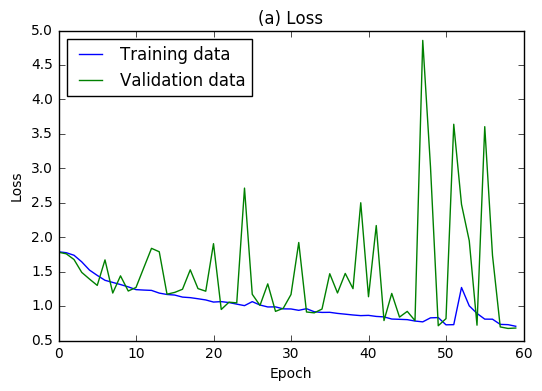

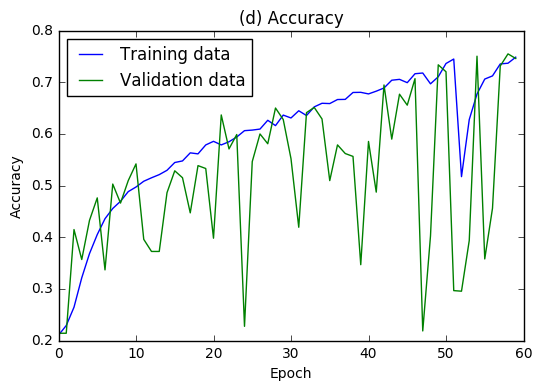

In [11]:
# Visualization
plot_loss(history, '(a) Loss')  # 학습 경과에 따른 정확도 변화 추이
plt.show()
plot_accuracy(history, '(d) Accuracy')
plt.show()

In [ ]:
#TEST 단계

In [12]:
model.save('deepsong_modelfit.h5') # 모델 아키텍처와 모델 가중치 저장

In [13]:
from tensorflow.keras.models import load_model
model = load_model('deepsong_modelfit.h5')

In [ ]:
#테스트 결과 도출

volcano  파일 길이 :  375
volcano  :  ./deepsong/test/volcano\vo_266.PNG
earth+mount  파일 길이 :  300
earth+mount  :  ./deepsong/test/earth+mount\eq001.jpg
fire  파일 길이 :  299
fire  :  ./deepsong/test/fire\fire.1.png
heavysnow  파일 길이 :  300
heavysnow  :  ./deepsong/test/heavysnow\heavy snow_original_hv_756.jpg_5d1dd50b-e8ae-43e7-b917-580b3ae4ca6b.jpg
city  파일 길이 :  303
city  :  ./deepsong/test/city\city001.jpg
nature  파일 길이 :  300
nature  :  ./deepsong/test/nature\00000000 (7).jpg


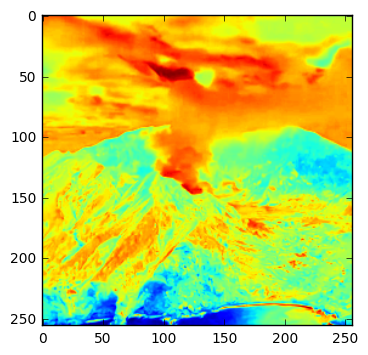

In [14]:
test_dir = './deepsong/test'
categories = ["volcano", "earth+mount", "fire", "heavysnow", "city", "nature"]
nb_classes = len(categories)

image_w = 256
image_h = 256

pixels = image_h * image_w * 3

test_image = []
test_label = []

for idx, name in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = test_dir + "/" + name
    files = glob.glob(image_dir+"/*.*")
    print(name, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        test_image.append(data)
        test_label.append(label)

        if i % 700 == 0:
            print(name, " : ", f)

test_image = np.array(test_image)
test_label = np.array(test_label)

#test image 정규화
test_image = test_image.astype('float32')
test_image = test_image / 255
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(test_image[0,:,:,0])

#test 개수 : 1877

In [15]:
#예측과 실제 값을 출력해보기
pred = model.predict(test_image)
print(test_label[0], pred[0])

[1 0 0 0 0 0] [0.19160058 0.15367566 0.07391924 0.10609587 0.21280015 0.26190862]


In [16]:
#test data를 이용해 평가 - 정확도 및 로스값 도출
test = model.evaluate(test_image, test_label, verbose=0)

print('loss :', test[0])
print('ACCURACY :', test[1])

loss : 0.7693207619605575
ACCURACY : 0.7192328


In [17]:
pred = np.argmax(pred, axis=1)
test_label = np.argmax(test_label, axis=1)

In [ ]:
#confusion matrix 값 계산

In [18]:
def true_positive(y_true, y_pred): #6개의 카테고리 각각의 정답을 맞춘 개수
    zero_true_positive  = 0 # 화산
    one_true_positive  = 0 # 지진+산사채
    two_true_positive  = 0 # 화재
    three_true_positive  = 0 # 폭설
    four_true_positive  = 0 # 도시
    five_true_positive  = 0 # 자연
    for i in range (1877):
        if y_pred[i] == 0 and y_true[i] == 0: # TP Case
            zero_true_positive += 1
        elif y_pred[i] == 1 and y_true[i] == 1:
            one_true_positive += 1
        elif y_pred[i] == 2 and y_true[i] == 2:
            two_true_positive += 1
        elif y_pred[i] == 3 and y_true[i] == 3:
            three_true_positive += 1
        elif y_pred[i] == 4 and y_true[i] == 4:
            four_true_positive += 1
        elif y_pred[i] == 5 and y_true[i] == 5:
            five_true_positive += 1
        i+=1
    return zero_true_positive, one_true_positive, two_true_positive, three_true_positive, four_true_positive, five_true_positive
print('true positive_each label:', true_positive(test_label, pred))

true positive_each label: (297, 151, 184, 284, 241, 193)


In [19]:
def zero_negative(y_true, y_pred): # 1번 카테고리(화산)가 답인데 다른 정답으로 예측한 개수
    one_false  = 0 # TP 초기화
    two_false  = 0 # TP 초기화
    three_false  = 0 # TP 초기화
    four_false  = 0 # TP 초기화
    five_false  = 0 # TP 초기화
    for i in range (1877):
        if y_pred[i] == 1 and y_true[i] == 0:
            one_false += 1
        elif y_pred[i] == 2 and y_true[i] == 0:
            two_false += 1
        elif y_pred[i] == 3 and y_true[i] == 0:
            three_false += 1
        elif y_pred[i] == 4 and y_true[i] == 0:
            four_false += 1
        elif y_pred[i] == 5 and y_true[i] == 0:
            five_false += 1
        i+=1
    return one_false, two_false, three_false, four_false, five_false
print('zero_negative:', zero_negative(test_label, pred))

zero_negative: (5, 42, 7, 4, 20)


In [20]:
def one_negative(y_true, y_pred): # 2번 카테고리(지진과 산사태)가 답인데 다른 정답으로 예측한 개수
    zero_false  = 0 # TP 초기화
    two_false  = 0 # TP 초기화
    three_false  = 0 # TP 초기화
    four_false  = 0 # TP 초기화
    five_false  = 0 # TP 초기화
    for i in range (1877):
        if y_pred[i] == 0 and y_true[i] == 1:
            zero_false += 1
        elif y_pred[i] == 2 and y_true[i] == 1:
            two_false += 1
        elif y_pred[i] == 3 and y_true[i] == 1:
            three_false += 1
        elif y_pred[i] == 4 and y_true[i] == 1:
            four_false += 1
        elif y_pred[i] == 5 and y_true[i] == 1:
            five_false += 1
        i+=1
    return zero_false, two_false, three_false, four_false, five_false
print('one_negative:', one_negative(test_label, pred))

one_negative: (5, 8, 18, 106, 12)


In [21]:
def two_negative(y_true, y_pred): # 3번 카테고리(화재)가 답인데 다른 정답으로 예측한 개수
    zero_false  = 0 # TP 초기화
    one_false  = 0 # TP 초기화
    three_false  = 0 # TP 초기화
    four_false  = 0 # TP 초기화
    five_false  = 0 # TP 초기화
    for i in range (1877):
        if y_pred[i] == 0 and y_true[i] == 2:
            zero_false += 1
        elif y_pred[i] == 1 and y_true[i] == 2:
            one_false += 1
        elif y_pred[i] == 3 and y_true[i] == 2:
            three_false += 1
        elif y_pred[i] == 4 and y_true[i] == 2:
            four_false += 1
        elif y_pred[i] == 5 and y_true[i] == 2:
            five_false += 1
        i+=1
    return zero_false, one_false, three_false, four_false, five_false
print('two_negative:', two_negative(test_label, pred))

two_negative: (48, 13, 3, 45, 6)


In [22]:
def three_negative(y_true, y_pred): # 4번 카테고리(폭설)가 답인데 다른 정답으로 예측한 개수
    zero_false  = 0 # TP 초기화
    one_false  = 0 # TP 초기화
    two_false  = 0 # TP 초기화
    four_false  = 0 # TP 초기화
    five_false  = 0 # TP 초기화
    for i in range (1877):
        if y_pred[i] == 0 and y_true[i] == 3:
            zero_false += 1
        elif y_pred[i] == 1 and y_true[i] == 3:
            one_false += 1
        elif y_pred[i] == 2 and y_true[i] == 3:
            two_false += 1
        elif y_pred[i] == 4 and y_true[i] == 3:
            four_false += 1
        elif y_pred[i] == 5 and y_true[i] == 3:
            five_false += 1
        i+=1
    return zero_false, one_false, two_false, four_false, five_false
print('three_negative:', three_negative(test_label, pred))

three_negative: (7, 0, 1, 4, 4)


In [23]:
def four_negative(y_true, y_pred): # 5번 카테고리(도시)가 답인데 다른 정답으로 예측한 개수
    zero_false  = 0 # TP 초기화
    one_false  = 0 # TP 초기화
    two_false  = 0 # TP 초기화
    three_false  = 0 # TP 초기화
    five_false  = 0 # TP 초기화
    for i in range (1877):
        if y_pred[i] == 0 and y_true[i] == 4:
            zero_false += 1
        elif y_pred[i] == 1 and y_true[i] == 4:
            one_false += 1
        elif y_pred[i] == 2 and y_true[i] == 4:
            two_false += 1
        elif y_pred[i] == 3 and y_true[i] == 4:
            three_false += 1
        elif y_pred[i] == 5 and y_true[i] == 4:
            five_false += 1
        i+=1
    return zero_false, one_false, two_false, three_false, five_false
print('four_negative:', four_negative(test_label, pred))

four_negative: (6, 27, 12, 5, 12)


In [24]:
def five_negative(y_true, y_pred): # 6번 카테고리(자연)가 답인데 다른 정답으로 예측한 개수
    zero_false  = 0 # TP 초기화
    one_false  = 0 # TP 초기화
    two_false  = 0 # TP 초기화
    three_false  = 0 # TP 초기화
    four_false  = 0 # TP 초기화
    for i in range (1877):
        if y_pred[i] == 0 and y_true[i] == 5:
            zero_false += 1
        elif y_pred[i] == 1 and y_true[i] == 5:
            one_false += 1
        elif y_pred[i] == 2 and y_true[i] == 5:
            two_false += 1
        elif y_pred[i] == 3 and y_true[i] == 5:
            three_false += 1
        elif y_pred[i] == 4 and y_true[i] == 5:
            four_false += 1
        i+=1
    return zero_false, one_false, two_false, three_false, four_false
print('five_negative:', five_negative(test_label, pred))

five_negative: (13, 34, 14, 18, 28)
